In [ ]:
from moment_utils import *

DATAROOT = './'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

In [41]:
baseline_ckas = {'V1': 0.6258297771450111, 'V4': 0.4492320504226044, 'IT': 0.28507653288199836}

P = 1000
Q = 100
num_reps = 100
filename = f'./all_ckas_P_{P}_Q_{Q}_rep_{num_reps}.npz'
layerwise_data = np.load(filename, allow_pickle=True)['all_data'].tolist()


# P = 2000
# Q = 150
# num_repeat = 50
# Q_n_ratio = 1/16
# filename = f"./all_models_Pl_{P}_Qb_{Q}_inv_Qratio_{int(1/Q_n_ratio)}_rep_{num_repeat}.npz"
# layerwise_data = np.load(filename, allow_pickle=True)['all_data'].tolist()


P = 2000
Q = 1000
num_repeat = 50
filename = f"./all_models_Pl_{P}_Qb_{Q}_sweep_Qnratio_rep_{num_repeat}.npz"
# filename = f"all_models_Pl_{P}_sweep_Qnratio.npz"
neuronwise_data = np.load(filename, allow_pickle=True)['all_data'].tolist()
Q_lists = np.load(filename, allow_pickle=True)['Q_lists'].tolist()

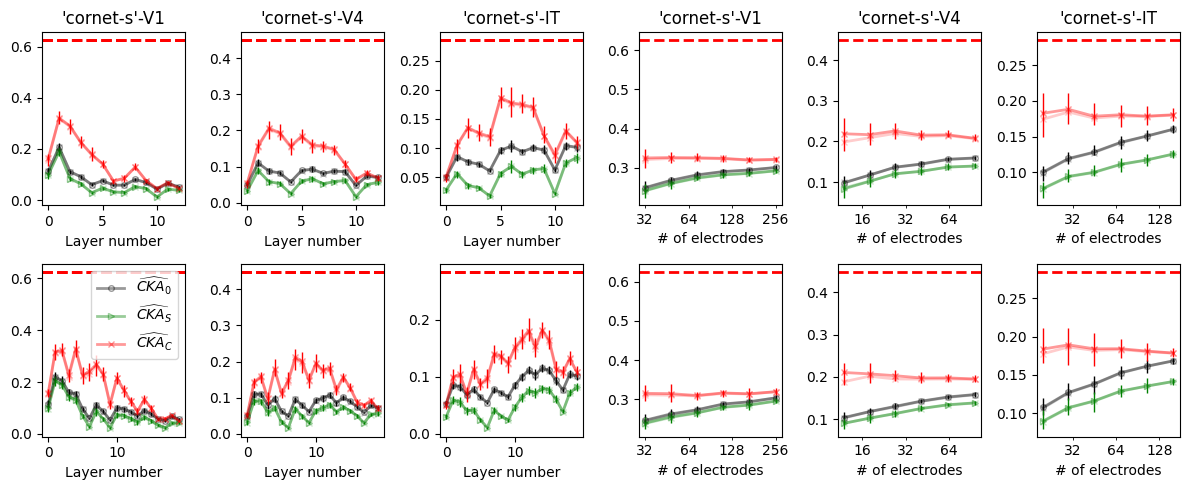

In [46]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

alphav = 0.2

sub_name = 'F'

fd = layerwise_data[sub_name]
fig, axs = plt.subplots(2, 6, figsize=(12, 5))

for n, model_name in enumerate(['cornet-s', 'resnet18']):
    for i, roi_name in enumerate(['V1', 'V4', 'IT']):

        if i == 0:
            roi_nm = '\''+model_name+'\'-'+'V1'
        elif i == 1:
            roi_nm = '\''+model_name+'\'-'+'V4'
        elif i == 2:
            roi_nm = '\''+model_name+'\'-'+'IT'

        ax = axs[n, i]

        for j in range(3):

            if j == 0:
                label = r'$\widehat{CKA}_0$'
                colorv = 'k'
                marker = 'o'
            elif j == 1:
                label = r'$\widehat{CKA}_S$'
                colorv = 'g'
                marker = '>'
            else:
                label = r'$\widehat{CKA}_C$'
                colorv = 'r'
                marker = 'x'

            roi_data = np.array(fd[model_name][roi_name])[:, :, :, j]

            cka = roi_data[:, :, 0] / np.sqrt(roi_data[:, :, 1] * roi_data[:, :, 2])
            cku_u = roi_data[:, :, 0].mean(-1) / np.sqrt(roi_data[:, :, 1].mean(-1)
                                                         * roi_data[:, :, 2].mean(-1))

            ms = 4
            ls = '-'
            lw = 2
            qoi = cka
            xoi = np.arange(len(cka))

            yval = np.nanmedian(qoi, axis=1)
            lower_error = np.nanquantile(qoi, axis=1, q=0.25)
            upper_error = np.nanquantile(qoi, axis=1, q=0.75)
            asymmetric_error = [yval-lower_error, upper_error-yval]
            ax.errorbar(xoi, yval, yerr=asymmetric_error, c=colorv, marker='', ls='', alpha=1, lw=1, zorder=0)
            yval = np.nanmean(qoi, axis=1)
            ax.plot(xoi, yval, c=colorv, marker=marker, ls=ls, alpha=0.4, ms=ms, lw=lw,
                    zorder=0, fillstyle='none', label=label)
            ax.plot(xoi, cku_u, alpha=alphav, c=colorv, ls=ls, fillstyle='none', marker='x', ms=ms, lw=lw)

            baseline_cka_val = baseline_ckas[roi_name]
            ax.axhline(baseline_cka_val, color='r', ls='--', lw=2)

        ax.set_xlabel('Layer number')
        if n == 0:
            ax.set_title(roi_nm)

fd = neuronwise_data[sub_name]
for n, model_name in enumerate(['cornet-s', 'resnet18']):
    for i, roi_name in enumerate(['V1', 'V4', 'IT']):

        if i == 0:
            roi_nm = '\''+model_name+'\'-'+'V1'
        elif i == 1:
            roi_nm = '\''+model_name+'\'-'+'V4'
        elif i == 2:
            roi_nm = '\''+model_name+'\'-'+'IT'

        ax = axs[n, i+3]

        for j in range(3):

            if j == 0:
                label = r'$\widehat{CKA}_0$'
                colorv = 'k'
                marker = 'o'
            elif j == 1:
                label = r'$\widehat{CKA}_S$'
                colorv = 'g'
                marker = '>'
            else:
                label = r'$\widehat{CKA}_C$'
                colorv = 'r'
                marker = 'x'

            roi_data = np.array(fd[model_name][roi_name])[:, :, :, j]

            cka = roi_data[:, :, 0] / np.sqrt(roi_data[:, :, 1] * roi_data[:, :, 2])
            cku_u = roi_data[:, :, 0].mean(-1) / np.sqrt(roi_data[:, :, 1].mean(-1)
                                                         * roi_data[:, :, 2].mean(-1))

            ms = 4
            ls = '-'
            lw = 2
            qoi = cka
            xoi = Q_lists[(sub_name, roi_name)]

            yval = np.nanmedian(qoi, axis=1)
            lower_error = np.nanquantile(qoi, axis=1, q=0.25)
            upper_error = np.nanquantile(qoi, axis=1, q=0.75)
            asymmetric_error = [yval-lower_error, upper_error-yval]
            ax.errorbar(xoi, yval, yerr=asymmetric_error, c=colorv, marker='', ls='', alpha=1, lw=1, zorder=0)
            yval = np.nanmean(qoi, axis=1)
            ax.plot(xoi, yval, c=colorv, marker=marker, ls=ls, alpha=0.4, ms=ms, lw=lw,
                    zorder=0, fillstyle='none', label=label)
            ax.plot(xoi, cku_u, alpha=alphav, c=colorv, ls=ls, fillstyle='none', marker='x', ms=ms, lw=lw)

        ax.set_xlabel('# of electrodes')
        if n == 0:
            ax.set_title(roi_nm)
        # ax.set_ylim([0, animal_sim_c[rid]*1.1])

        import matplotlib.ticker as ticker
        ax.set_xscale('log')
        locs = [16, 32, 64, 128, 256]
        ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
        ax.xaxis.set_major_locator(ticker.NullLocator())
        ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())

        baseline_cka_val = baseline_ckas[roi_name]
        ax.axhline(baseline_cka_val, color='r', ls='--', lw=2)

axs[1, 0].legend()
plt.tight_layout()